# Part-A : *EDA*

In [100]:
%matplotlib inline

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression

In [101]:
df = pd.read_csv('insurance.csv')

In [102]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
df.shape

(1338, 7)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [105]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [48]:
df.duplicated().sum()

np.int64(1)

In [69]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [70]:
df.drop_duplicates(inplace = True)

In [51]:
import matplotlib.pyplot as plt 
import seaborn as sns

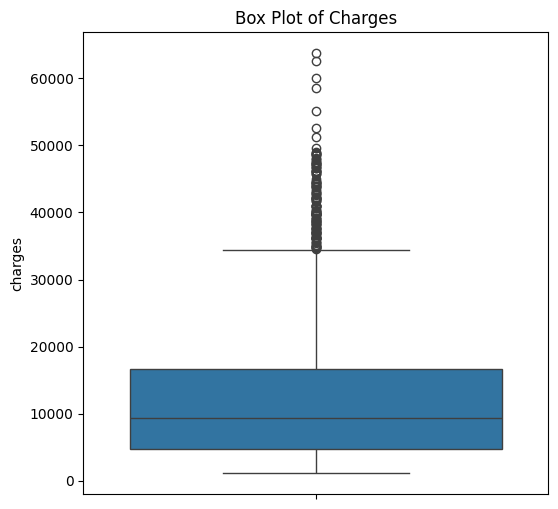

In [108]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['charges'])
plt.title("Box Plot of Charges")
plt.show()

In [109]:
df = df[df['charges'] < 50000]

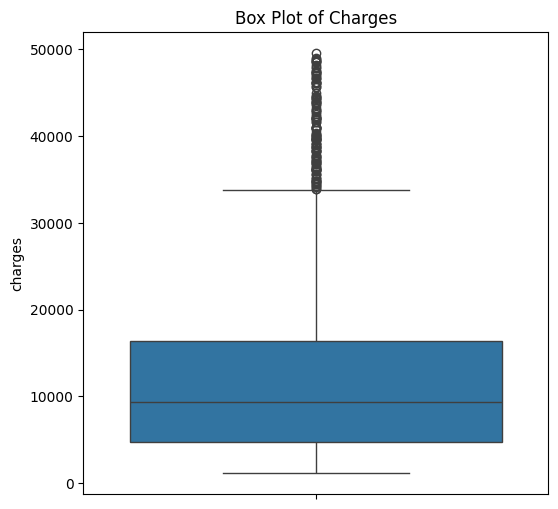

In [110]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['charges'])
plt.title("Box Plot of Charges")
plt.show()

In [111]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [112]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [113]:
df = pd.get_dummies(df , columns = ['sex', 'smoker', 'region'])

In [114]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [115]:
df = df.astype(int)

In [116]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [117]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [118]:
df.drop(columns=['sex_female' , 'smoker_no' , 'region_southwest'] , inplace=True)

In [119]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
0,19,27,0,16884,0,1,0,0,0
1,18,33,1,1725,1,0,0,0,1
2,28,33,3,4449,1,0,0,0,1
3,33,22,0,21984,1,0,0,1,0
4,32,28,0,3866,1,0,0,1,0


In [120]:
df.dtypes

age                 int64
bmi                 int64
children            int64
charges             int64
sex_male            int64
smoker_yes          int64
region_northeast    int64
region_northwest    int64
region_southeast    int64
dtype: object

In [121]:
corr = df.corr()

In [132]:
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
age,1.000000,0.107576,0.043197,0.304562,-0.022425,-0.028377,0.004372,-0.000367,-0.013238
bmi,0.107576,1.000000,0.013169,0.184694,0.049107,-0.008328,-0.139133,-0.139133,0.271652
children,0.043197,0.013169,1.000000,0.076994,0.016042,0.011084,-0.023703,0.022816,-0.021127
charges,0.304562,0.184694,0.076994,1.000000,0.057521,0.785616,0.011123,-0.043507,0.074786
sex_male,-0.022425,0.049107,0.016042,0.057521,1.000000,0.075786,-0.000271,-0.010787,0.017669
smoker_yes,-0.028377,-0.008328,0.011084,0.785616,0.075786,1.000000,0.005277,-0.038487,0.069074
region_northeast,0.004372,-0.139133,-0.023703,0.011123,-0.000271,0.005277,1.000000,-0.320437,-0.345990
region_northwest,-0.000367,-0.139133,0.022816,-0.043507,-0.010787,-0.038487,-0.320437,1.000000,-0.345990
region_southeast,-0.013238,0.271652,-0.021127,0.074786,0.017669,0.069074,-0.345990,-0.345990,1.000000


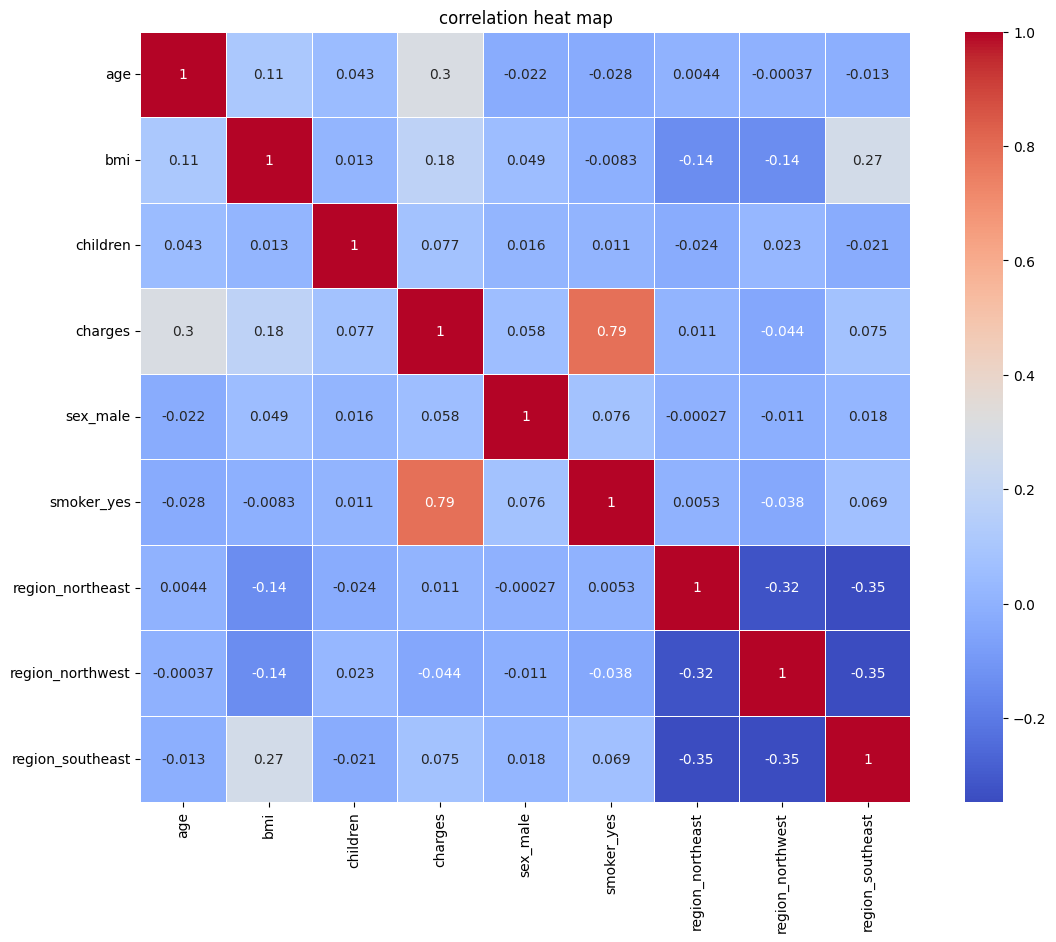

In [122]:
plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,
    cmap = 'coolwarm',
    square = True,
    linewidths = 0.5  
)
plt.title("correlation heat map")
plt.show()

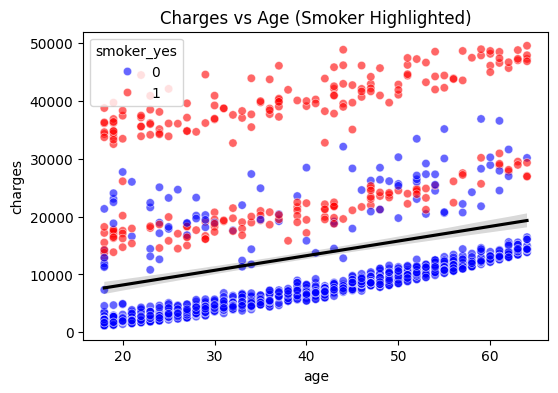

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.scatterplot(
    x='age',
    y='charges',
    hue='smoker_yes',
    data=df,
    palette={0: 'blue', 1: 'red'},
    alpha=0.6
)
sns.regplot(
    x='age',
    y='charges',
    data=df,
    scatter=False,
    color='black'
)

plt.title("Charges vs Age (Smoker Highlighted)")
plt.show()


In [134]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
0,19,27,0,16884,0,1,0,0,0
1,18,33,1,1725,1,0,0,0,1
2,28,33,3,4449,1,0,0,0,1
3,33,22,0,21984,1,0,0,1,0
4,32,28,0,3866,1,0,0,1,0


In [135]:
y = df['charges']

In [136]:
x = df.drop(columns=['charges'])

In [137]:
x.shape

(1331, 8)

y.shape

In [139]:
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
0,19,27,0,0,1,0,0,0
1,18,33,1,1,0,0,0,1
2,28,33,3,1,0,0,0,1
3,33,22,0,1,0,0,1,0
4,32,28,0,1,0,0,1,0


In [140]:
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

## train test split

In [219]:
from sklearn.model_selection import train_test_split

In [343]:
X = df[['age']]     # double brackets → DataFrame
y = df['charges']   # Series is fine

In [344]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [345]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [346]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [347]:
y_pred = model.predict(X_test_scaled)


In [348]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.03035419046295329


C:\Users\praty\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


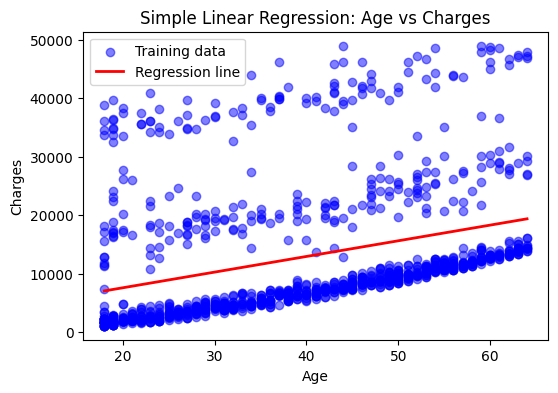

In [349]:
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')

# regression line
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1)
X_line_scaled = scaler.transform(X_line)
y_line = model.predict(X_line_scaled)

plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression line')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Simple Linear Regression: Age vs Charges")
plt.legend()
plt.show()

In [358]:
def cost_function(X, y, m, c):
    n = len(y)
    y_pred = m * X + c
    return (1/n) * np.sum((y - y_pred)**2)


In [383]:
class MyLinearRegression:
    def __init__(self, lr=1e-5, tol= 20, max_steps=500):
        self.lr = lr
        self.tol = tol
        self.max_steps = max_steps
        self.m = 0
        self.c = 0
        self.history = []

    def fit(self, X, y):
        X = X.flatten()
        n = len(y)

        prev_cost = float('inf')

        for _ in range(self.max_steps):
            y_pred = self.m * X + self.c
            cost = cost_function(X, y, self.m, self.c)

            # stop if cost reduction is tiny → minimum reached
            if abs(prev_cost - cost) < self.tol:
                break

            prev_cost = cost

            dm = (-2/n) * np.sum(X * (y - y_pred))
            dc = (-2/n) * np.sum(y - y_pred)

            self.m -= self.lr * dm
            self.c -= self.lr * dc

            self.history.append((self.m, self.c, cost))

    def predict(self, X):
        return self.m * X.flatten() + self.c


In [392]:
X = df[['age']].values
y = df['charges'].values

my_lr = MyLinearRegression(lr=1e-5)
my_lr.fit(X, y)

print("Final slope:", my_lr.m)
print("Final intercept:", my_lr.c)
print("Final cost:", my_lr.history[-1][2])

Final slope: 323.117897013258
Final intercept: 8.675639803794642
Final cost: 125177724.82914288


In [393]:
model.coef_

array([3764.46121681])

In [394]:
model.intercept_

np.float64(12779.093045112782)

C:\Users\praty\AppData\Local\Temp\ipykernel_4600\981608830.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


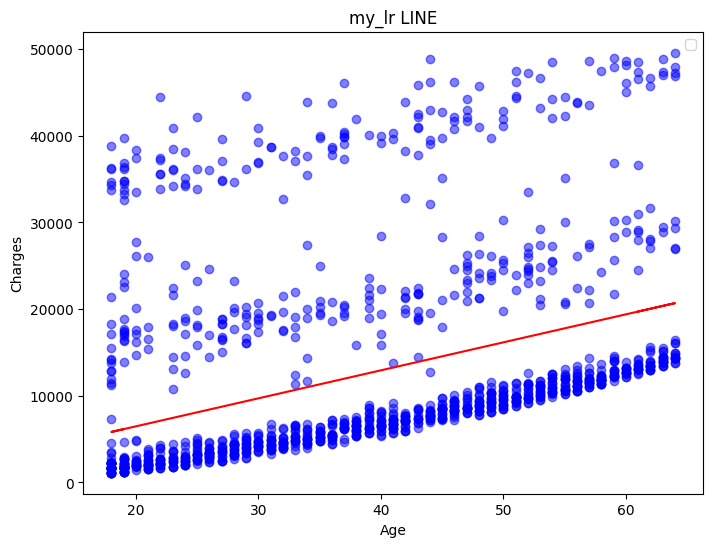

In [397]:
m = my_lr.m
c = my_lr.c

# X and y from dataset
X = df[['age']].values.flatten()
y = df['charges'].values

# predicted line using YOUR slope & intercept
y_pred = m * X + c

# plot
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color='red')

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("my_lr LINE")
plt.legend()
plt.show()


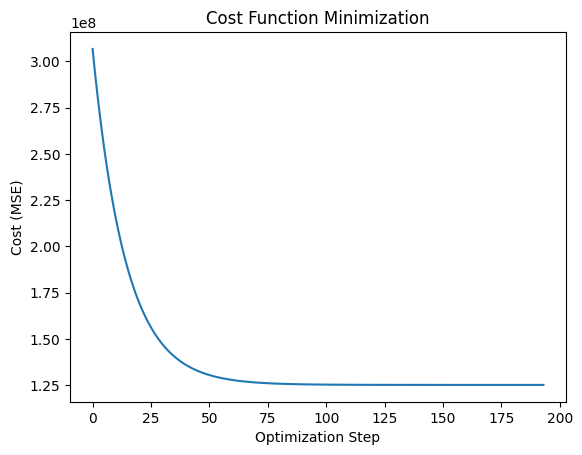

In [396]:
costs = [h[2] for h in my_lr.history]

plt.plot(costs)
plt.xlabel("Optimization Step")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Minimization")
plt.show()


In [398]:
X = df[['age']].values.flatten()
y = df['charges'].values

history = my_lr.history   # [(m, c, cost), ...]

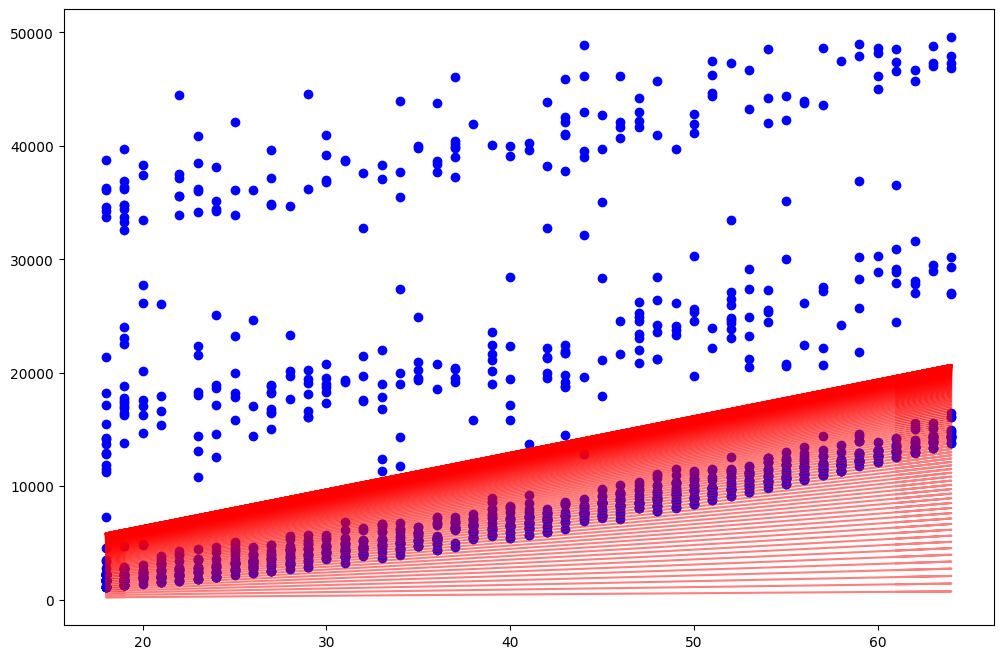

In [423]:
plt.figure(figsize=(12,8))
for i, (m, c, cost) in enumerate(history):
    y_line = m * X + c
    plt.plot(X, y_line, color='red',alpha = 0.5)
plt.scatter(X, y, color='blue', alpha=1, label='Data Points')

In [424]:
X = df.drop(columns='charges')
y = df['charges']


In [425]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [426]:
scaler2 = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [427]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [428]:
y_pred = model.predict(X_test_scaled)

In [429]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score :", r2)
print("MAE      :", mae)


R2 Score : 0.7751844684234924
MAE      : 4226.45929088425


In [430]:
X = df.drop(columns='charges')
y = df['charges']

In [431]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [439]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [440]:
y_pred = dt.predict(X_test)

In [441]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.8744961381449274
